# Principal Component Analysis 

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Wine.csv')

# Splitting features (X) and target variable (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]    # Last column


In [2]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
from sklearn.preprocessing import StandardScaler

# Feature scaling for better PCA performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
from sklearn.decomposition import PCA

# Applying PCA
pca = PCA(n_components=3)  # You can adjust the number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [5]:
from sklearn.linear_model import LogisticRegression

# Training a classifier (Logistic Regression in this case)
classifier = LogisticRegression()
classifier.fit(X_train_pca, y_train)


LogisticRegression()

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Predicting on the test set
y_pred = classifier.predict(X_test_pca)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")


Accuracy: 0.97, Precision: 0.97, Recall: 0.97


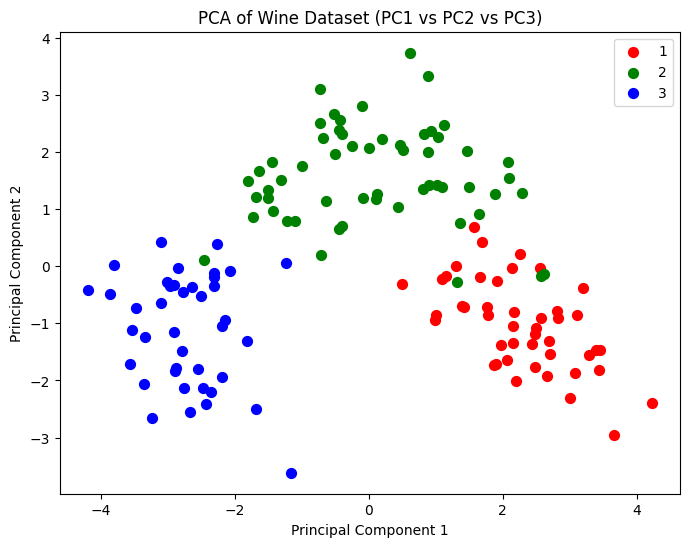

In [10]:
import matplotlib.pyplot as plt
# Assuming you have performed PCA with 3 components and stored in X_train_pca
X_train_pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2', 'PC3'])

# Plotting PC1 vs PC2 from the transformed data
plt.figure(figsize=(8, 6))

targets = y.unique()
colors = ['r', 'g', 'b']  # Adjust according to your classes

for target, color in zip(targets, colors):
    indices_to_keep = (y_train == target).values  # Filter by y_train
    plt.scatter(
        X_train_pca_df.loc[indices_to_keep, 'PC1'],
        X_train_pca_df.loc[indices_to_keep, 'PC2'],
        c=color,
        s=50,
        label=target
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of Wine Dataset (PC1 vs PC2 vs PC3)')
plt.show()


# Linear Discriminant Analysis (LDA)


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying Linear Discriminant Analysis (LDA) with n_components=2
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train Logistic Regression classifier
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_lda, y_train)

# Predict using the test set
y_pred = classifier.predict(X_test_lda)

# Model Evaluation - Accuracy, Precision, Recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000


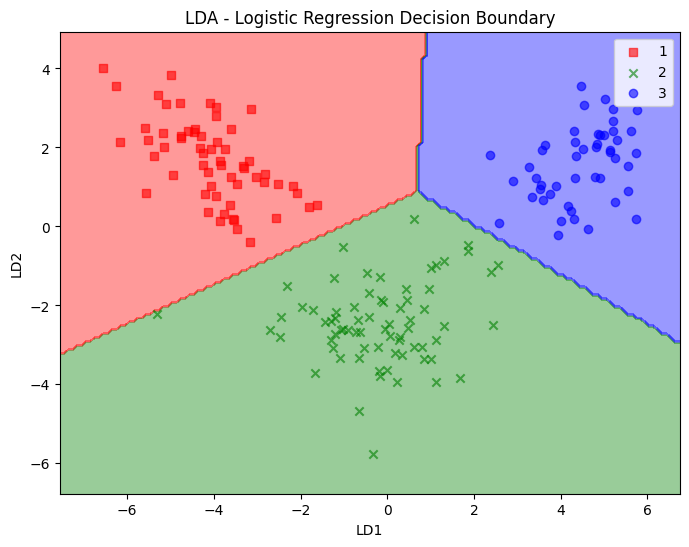

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Plot decision regions
X_combined_lda = np.vstack((X_train_lda, X_test_lda))
y_combined = np.hstack((y_train, y_test))

# Create meshgrid
x_min, x_max = X_combined_lda[:, 0].min() - 1, X_combined_lda[:, 0].max() + 1
y_min, y_max = X_combined_lda[:, 1].min() - 1, X_combined_lda[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Plot decision boundary
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Plot class samples
markers = ['s', 'x', 'o']
colors = ['r', 'g', 'b']
for idx, cl in enumerate(np.unique(y_combined)):
    plt.scatter(x=X_combined_lda[y_combined == cl, 0],
                y=X_combined_lda[y_combined == cl, 1],
                alpha=0.6,
                color=colors[idx],
                marker=markers[idx],
                label=cl)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA - Logistic Regression Decision Boundary')
plt.legend(loc='best')
plt.show()


# Kernel PCA

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

# Load dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf')
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

# Train Logistic Regression classifier
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_kpca, y_train)

# Predict using the test set
y_pred = classifier.predict(X_test_kpca)

# Model Evaluation - Accuracy, Precision, Recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
